### Desafio - Bloco 3 - Classificação Diabetes

Baseado no exemplo prático deste bloco com a implementação do algoritmo MLPClassifier utilizando o Sklearn Python, crie um modelo neural para classificação da incidência de Diabetes baseado em características definidas no dataset, em anexo. Note que o dataset possui muitas particularidades. Há amostras com variáveis zeradas e isso pode ser um problema no treinamento e testes. Outro detalhe que precisa ser observado é a correlação entre variáveis, que muitas vezes se apresentam baixas (boas correlações devem se apresentar acima de 0,8). Outros detalhes podem ser observados, como a distribuição entre 2 variáveis distintas, podendo inferir em alguma informação importante na definição do modelo. O desafio é construir um modelo neural de classificação (MLPClassifier) que apresente um resultado satisfatório. Para isso, a definição da quantidade de neurônio na camada oculta e a quantidade de camadas, além da função de ativação e épocas de treinamento podem influenciar nos resultados.

Fonte do dataset com explicações sobre as variáveis: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPClassifier # Biblioteca para utilização do classificador MLP
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.model_selection import learning_curve # Biblioteca para avaliar um modelo por meio da curva de aprendizagem baseado no tamanho o conjunto de dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, precision_score, confusion_matrix, classification_report # Biblioteca para avaliação de métricas da execução do classificador
from sklearn import metrics
import seaborn as sns # é uma biblioteca baseada no Matplotlib, que oferece uma interface de alto nível para criação de gráficos estatísticos
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulação de arrays Numpy
from numpy import mean, std
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
x = df.iloc[:, 0:8].values
y = df.iloc[:, 8:].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

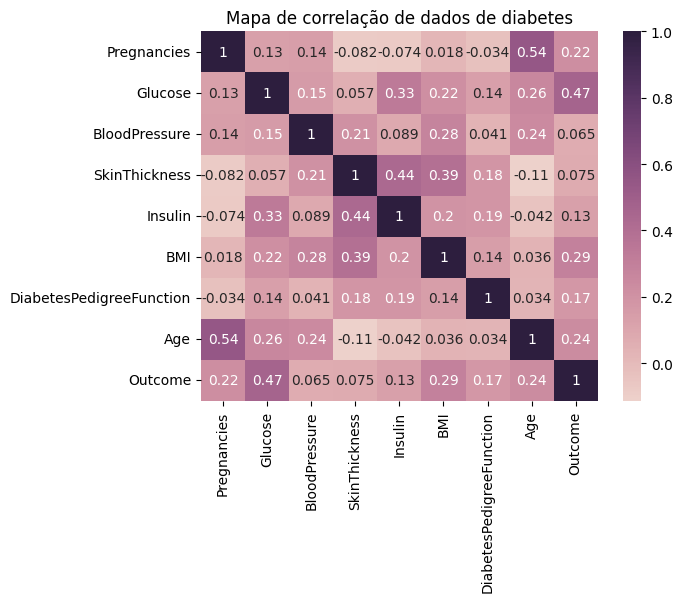

In [6]:
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title("Mapa de correlação de dados de diabetes")
ax=ax

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=10000, epsilon=1e-10, learning_rate='constant', learning_rate_init=0.001)
mlp.fit(x_train, y_train)

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,hidden_layer_sizes,20
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,10000
,shuffle,True
,random_state,None



MÉTRICAS DA CLASSIFICAÇÃO
Acurácia das amostras na classificação não apresentadas no treinamento: 0.7922077922077922
Acurácia balanceada na classificação das amostras não apresentadas no treinamento: 0.7267176815369586
Matriz de confusão das amostras não apresentadas no treinamento:
 [[142   6]
 [ 42  41]]

Relatório de classificação das amostras não apresentadas no treinamento:
               precision    recall  f1-score   support

    Diabético       0.77      0.96      0.86       148
Não-Diabético       0.87      0.49      0.63        83

     accuracy                           0.79       231
    macro avg       0.82      0.73      0.74       231
 weighted avg       0.81      0.79      0.77       231



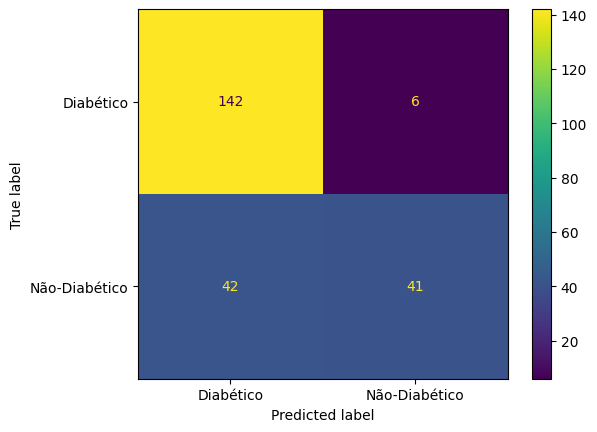

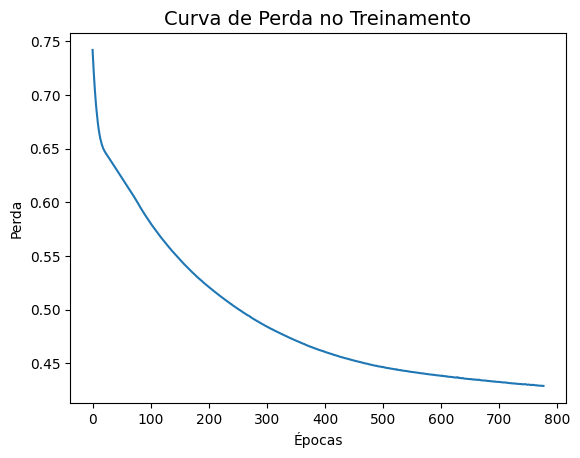


MÉTRICAS DO TREINAMENTO
Melhor loss do treinamento:  0.42897444938223733
Último valor do loss para convergência:  0.4289856350146256
Mean Absolute Error (MAE): 0.2077922077922078
Mean Squared Error (MSE): 0.2077922077922078
Root Mean Squared Error (RMSE): 0.4558423058385518
Mean Absolute Percentage Error (MAPE): 116976613697935.14
R2:  0.09736242266362727


In [8]:
y_pred = mlp.predict(x_test)

print("\nMÉTRICAS DA CLASSIFICAÇÃO")
# Todas as métricas do sklearn.metrics para classificação https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
print(f"Acurácia das amostras na classificação não apresentadas no treinamento: {accuracy_score(y_test, y_pred)}")
print(f"Acurácia balanceada na classificação das amostras não apresentadas no treinamento: {balanced_accuracy_score(y_test, y_pred)}")
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")

print("")

relatorio = classification_report(y_test, y_pred, target_names=["Diabético", "Não-Diabético"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["Diabético", "Não-Diabético"])
cm_display.plot()
plt.show()

print("")

# Plotando o gráfico de erros no processo de treinamento
plt.plot(mlp.loss_curve_)
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

print("\nMÉTRICAS DO TREINAMENTO")

print("Melhor loss do treinamento: ", mlp.best_loss_) # best_loss_ fornece o melhor valor de perda durante o treinamento
print("Último valor do loss para convergência: ", mlp.loss_) # loss_ fornece o último valor de perda do treinamento
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(y_test, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.

In [9]:
print("Precision Score: ", precision_score(y_test, y_pred))

Precision Score:  0.8723404255319149


In [10]:
# Criando uma sequência de operações com Pipeline
MLP_pipeline = Pipeline(steps=[
  ("Padronização", StandardScaler()),
  ("MLP", MLPClassifier(hidden_layer_sizes=(30), random_state=12, max_iter=10000, epsilon=1e-10, learning_rate='constant', learning_rate_init=0.0001))
])

# Testando o dataset completo utilizando a validação cruzada
scores_cross_val = cross_val_score(MLP_pipeline, x, y, cv=5)
print("Resultados da validação cruzada do conjunto completo de dados:")
print(scores_cross_val)
print("Média: ", mean(scores_cross_val))
print("Desvio Padrão: ", std(scores_cross_val))

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/skle

Resultados da validação cruzada do conjunto completo de dados:
[0.75974026 0.74675325 0.74675325 0.81699346 0.75163399]
Média:  0.7643748408454292
Desvio Padrão:  0.026734133108996125


In [11]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(10), (20), (30), (50)],
    'max_iter': [2000, 5000],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)

x = scaler.fit_transform(x)
grid.fit(x, y)

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/skle

,estimator,MLPClassifier()
,param_grid,"{'activation': ['tanh', 'relu'], 'hidden_layer_sizes': [10, 20, ...], 'learning_rate': ['constant', 'adaptive'], 'max_iter': [2000, 5000], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,hidden_layer_sizes,10


In [12]:
print("Melhores valores dos parâmetros do grid: ", grid.best_params_)
print("Parâmetros mais relevantes para estimar: ", grid.best_estimator_)
print("Melhor acurácia: ", grid.best_score_)

Melhores valores dos parâmetros do grid:  {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'adam'}
Parâmetros mais relevantes para estimar:  MLPClassifier(hidden_layer_sizes=10, max_iter=5000)
Melhor acurácia:  0.7839232662762075


In [18]:
print("Resultado para predição do dataset de treinamento - Predição: ", grid.predict(x_test[0:20]))
print("Resultado para predição do dataset de treinamento - Esperado: ", y_test[0:20].flatten())

Resultado para predição do dataset de treinamento - Predição:  [0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0]
Resultado para predição do dataset de treinamento - Esperado:  [0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0]
